In [3]:
from sklearn.datasets import fetch_20newsgroups
groups = fetch_20newsgroups()

In [4]:
groups.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [5]:
groups['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [6]:
groups.target

array([7, 4, 4, ..., 3, 1, 8])

In [7]:
import numpy as np
np.unique(groups.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [8]:
groups.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

C:\Users\mengchen\AppData\Local\Temp\ipykernel_22224\73771861.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(groups.target)
c:\Users\mengchen\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


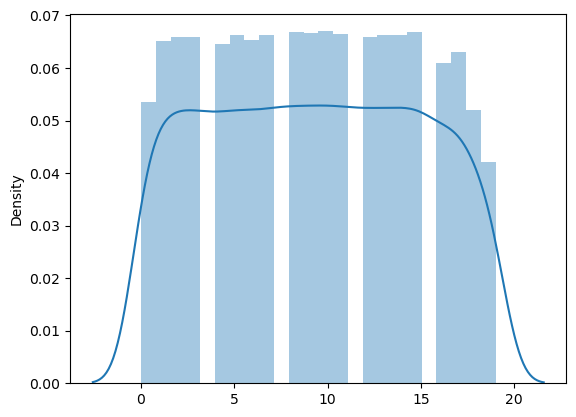

In [9]:
import seaborn as sns
sns.distplot(groups.target)
import matplotlib.pyplot as plt
plt.show()

['able' 'accept' 'access' 'according' 'act' 'action' 'actually' 'add'
 'address' 'ago' 'agree' 'algorithm' 'allow' 'american' 'anonymous'
 'answer' 'anybody' 'apple' 'application' 'apr' 'arab' 'area' 'argument'
 'armenian' 'article' 'ask' 'asked' 'assume' 'atheist' 'attack' 'attempt'
 'available' 'away' 'bad' 'based' 'basic' 'belief' 'believe' 'best'
 'better' 'bible' 'big' 'bike' 'bit' 'black' 'board' 'body' 'book' 'box'
 'build' 'bus' 'business' 'buy' 'ca' 'california' 'called' 'came' 'car'
 'card' 'care' 'carry' 'case' 'cause' 'center' 'certain' 'certainly'
 'chance' 'change' 'check' 'child' 'chip' 'christian' 'church' 'city'
 'claim' 'clear' 'clipper' 'code' 'college' 'color' 'come' 'coming'
 'command' 'comment' 'common' 'communication' 'company' 'computer'
 'computing' 'consider' 'considered' 'contact' 'control' 'controller'
 'copy' 'correct' 'cost' 'country' 'couple' 'course' 'cover' 'create'
 'crime' 'current' 'cut' 'data' 'day' 'db' 'deal' 'death' 'department'
 'design' 'device

c:\Users\mengchen\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


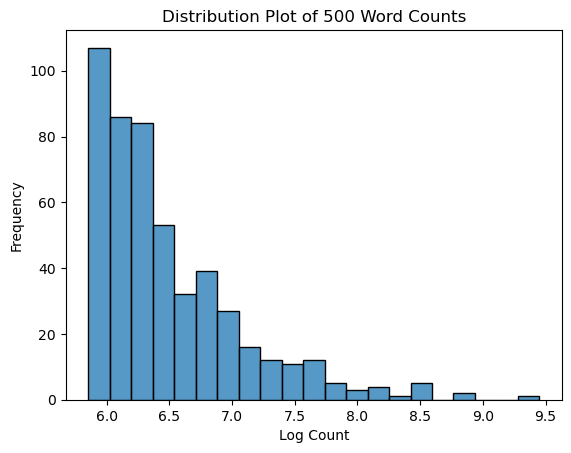

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer

def letters_only(astr):
    return astr.isalpha()

# CountVectorizer用于将文本数据转化为词频矩阵。
# 参数stop_words="english"表示移除英文停用词（如"a", "the", "is"等常见但无意义的单词）。
# max_features=500表示仅保留出现频率最高的500个单词。
cv = CountVectorizer(stop_words="english", max_features=500)
# 从20个新闻组话题的语料库中获取数据。默认情况下，这个函数会返回一个包含多个新闻组的对象
groups = fetch_20newsgroups()

# 数据预处理
# 仅保留全为字母的单词，并且不是人名
# 使用词性还原，去除一些重复的单词，例如words相对于word是重复的
cleaned = []
all_names = set(names.words())
lemmatizer = WordNetLemmatizer()
for post in groups.data:
    cleaned.append(' '.join([lemmatizer.lemmatize(word.lower()) for word in post.split() if letters_only(word) and word not in all_names]))

# 将文本数据转换为词频矩阵。
# transformed是一个稀疏矩阵，其中每一行表示一个文档，每一列表示一个单词，值是该单词在该文档中出现的次数。
transformed = cv.fit_transform(cleaned)
# 返回词汇表中所有的单词（特征）
print(cv.get_feature_names_out())

# transformed.toarray()将稀疏矩阵转换为密集数组。
# sum(axis=0)计算每个单词在所有文档中的总出现次数。
# np.log(...)取这些总出现次数的对数，以便更好地展示分布（对数变换可以减少极端值的影响，使图形更容易解释）。
# 使用Seaborn的distplot绘制对数单词频率的分布图。
sns.histplot(np.log(transformed.toarray().sum(axis=0)))
plt.xlabel('Log Count')
plt.ylabel('Frequency')
plt.title('Distribution Plot of 500 Word Counts')
plt.show()

c:\Users\mengchen\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


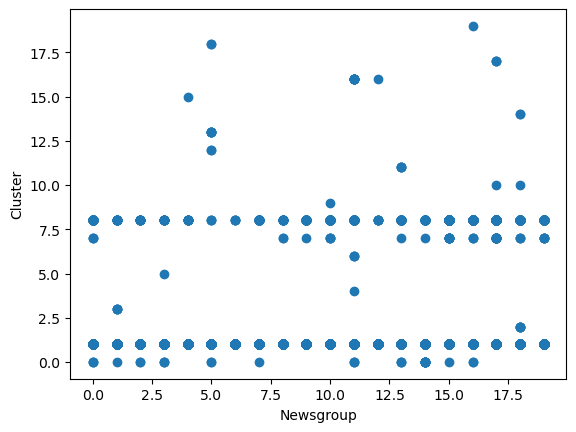

In [11]:
"""
这段代码首先清理文本数据，去除停用词、人名，并进行词形还原。
然后将清理后的文本数据转换为词频矩阵。
并使用K-means算法对其进行聚类。
最后，通过散点图展示新闻组与聚类结果的关系，直观地展示了不同新闻组在聚类中的分布情况。
"""
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def letters_only(astr):
 return astr.isalpha()

cv = CountVectorizer(stop_words="english", max_features=500)
groups = fetch_20newsgroups()
cleaned = []
all_names = set(names.words())
lemmatizer = WordNetLemmatizer()

for post in groups.data:
        cleaned.append(' '.join([
                             lemmatizer.lemmatize(word.lower())
                             for word in post.split()
                             if letters_only(word)
                             and word not in all_names]))

transformed = cv.fit_transform(cleaned)
# K-means 聚类算法
km = KMeans(n_clusters=20)
km.fit(transformed)
# 获取新闻组的真实标签labels。
# 绘制散点图，X轴为真实标签（新闻组），Y轴为K-means聚类标签。
labels = groups.target
plt.scatter(labels, km.labels_)
plt.xlabel('Newsgroup')
plt.ylabel('Cluster')
plt.show()

In [12]:
"""
有一种话题建模算法叫作非负矩阵分解（Non-negative Matrix Factorization，NMF）。
该算法将一个非负矩阵分解为两个较小矩阵的乘积，分解后的两个矩阵的所有元素也都是非负的。

从20个新闻组数据集中获取文本数据。
清理文本数据，去除停用词、人名，并进行词形还原。
使用CountVectorizer将清理后的文本数据转换为词频矩阵。
使用NMF模型从词频矩阵中提取主题。
打印每个主题的前8个词，帮助理解每个主题的主要内容。
"""

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import NMF

def letters_only(astr):
    return astr.isalpha()


cv = CountVectorizer(stop_words="english", max_features=500)
groups = fetch_20newsgroups()
cleaned = []
all_names = set(names.words())
lemmatizer = WordNetLemmatizer()
for post in groups.data:
    cleaned.append(' '.join([
                        lemmatizer.lemmatize(word.lower())
                        for word in post.split()
                        if letters_only(word)
                        and word not in all_names]))
transformed = cv.fit_transform(cleaned)

# 非负矩阵分解，用于提取主题
# 初始化NMF模型，设置提取100个主题，指定随机种子为43。
# 使用词频矩阵进行模型训练
nmf = NMF(n_components=100, random_state=43).fit(transformed)
# 遍历每个主题（topic_idx表示主题编号，topic是该主题的特征权重数组）。
# 获取每个主题中权重最大的前8个词。
# topic.argsort()[:-9:-1]返回排序后权重最高的前8个词的索引（从大到小）。
# cv.get_feature_names()[i]根据索引获取对应的单词。
# 打印每个主题的编号和对应的前8个词。
for topic_idx, topic in enumerate(nmf.components_):
    label = '{}: '.format(topic_idx)
    print(label, " ".join([cv.get_feature_names_out()[i]
                        for i in topic.argsort()[:-9:-1]]))

0:  wa went came said started took told woman
1:  db bit data place stuff add time line
2:  image file color version free available display use
3:  file information set command change section entry write
4:  disk drive hard controller support card board head
5:  entry program rule source use number info email
6:  world muslim life earth religious news religion million
7:  image user software package include color support display
8:  using function work product order version code probably
9:  state united national house public control political federal
10:  hockey league team game division player play final
11:  armenian turkish russian muslim road city today single
12:  ha able called taken given past exactly looking
13:  space nasa technology service national international small communication
14:  god bible shall man life hell love end
15:  output line open write read return build entry
16:  people country tell doing live killed place care
17:  widget application value type set return